# Librerías

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Variables

In [76]:
#Elegimos el número cuántico l

#Create a grid of X and Y values
n=1000 #puntos en cada eje
m=1 #dimension del lado del diagrama 
X = np.linspace(-m, m, n)
Y = np.linspace(-m, m, n)
X, Y = np.meshgrid(X, Y)
Z= Y-1j*X #Si acá reemplazo X por Y puedo rotar pi/2 la onda plana, y el tenedor queda vertical

#Defino el ángulo polar phi
phi=np.arctan2(Y,X) #Primero se pone Y y luego X, así dice numpy y wikipedia

# Cálculo de las fases y Plots

## Onda Plana

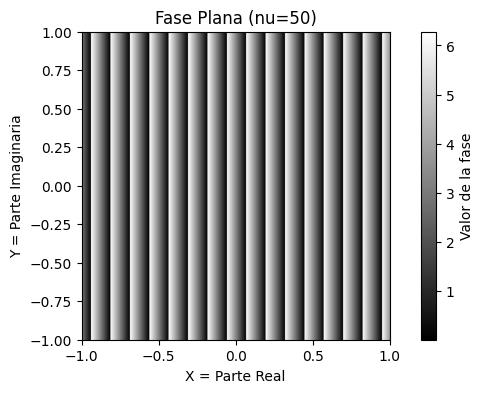

In [77]:
# Exponencial de onda plana
def P(Z,nu):
    return np.exp(nu*Z) #Notar la deformación de la singularidad del tenedor al variar esta fase
#Elijo una frecuencia nu
nu=50
# Calculo la phase
phase_P=np.angle(P(Z,nu))
#Normalizo los valores de phase al intervalo [0,2pi] https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range
phase_P_n = (phase_P+np.pi)
# Step 5: Plot phase of g(z) using colormap
plt.rcParams['figure.dpi']=100
plt.imshow(phase_P_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Fase Plana (nu=%i)'%nu)

plt.savefig('Muestra plana.jpg', format='jpg', dpi=600, bbox_inches='tight')

plt.show()

## Onda de fase azimutal

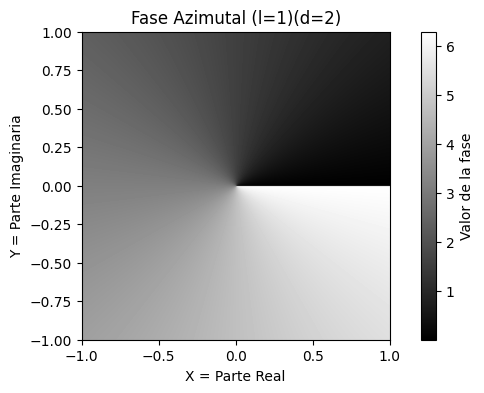

In [78]:
# Exponencial Azimutal
def eA(phi,l,d):
    return np.exp(1j*(l*phi-d*np.pi/2)) #Notar la deformación de la singularidad del tenedor al variar esta fase

#Elijo el número cuántico l y una fase d adicional y calculo la fase de f(phi,l,d)
l=1
d=2
phase_eA = np.angle(eA(phi,l,d)) #esto retorna valores de phase entre [-pi,pi]

#Normalizo los valores de phase al intervalo [0,2pi] https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range
phase_eA_n = (phase_eA+np.pi)

#Plot phase of f(phi) using colormap
#plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=100
plt.imshow(phase_eA_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Fase Azimutal (l=%i)'%l+'(d=%i)'%d)

plt.savefig('Muestra l1.jpg', format='jpg', dpi=600, bbox_inches='tight')

plt.show()

## Superposición azimutal+plana

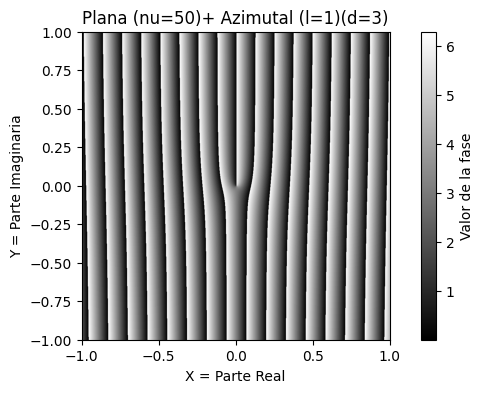

In [79]:
l=1    #Nro cuántico
d=3    #Fase cte adicional de la exp azimutal (múltiplos de pi/2)
nu=50  #Frecuencia de la onda plana
phase_eA_plus_P=np.angle(eA(phi,l,d)*P(Z,nu)) #Notar que hay que hacer el producto para que aparezca el tenedor
phase_eA_plus_P_n = phase_eA_plus_P+np.pi

# Step 5: Plot phase of f(phi)+g(z) using colormap
#plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=100
plt.imshow(phase_eA_plus_P_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Plana (nu=%i)'%nu+'+ Azimutal (l=%i)'%l+'(d=%i)'%d)
#plt.savefig('Plana (nu=%i)'%nu+' + Azimutal (l=%i)'%l+'(d=%i)'%d)
plt.show()


## Prueba con contourf

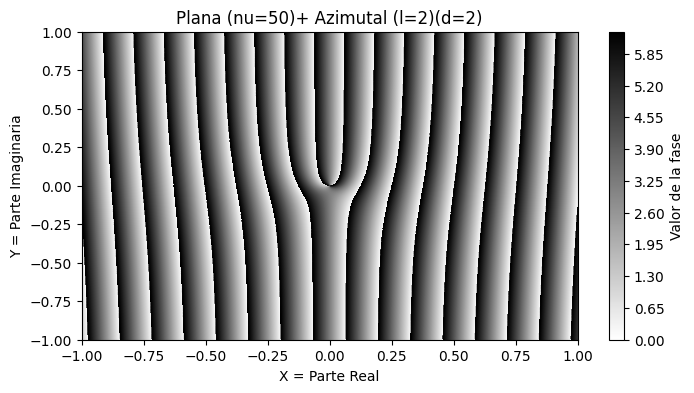

In [80]:
l=2    #Nro cuántico
d=2    #Fase cte adicional de la exp azimutal (múltiplos de pi/2)
nu=50  #Frecuencia de la onda plana
phase_eA_plus_P=np.angle(eA(phi,l,d)*P(Z,nu)) #Notar que hay que hacer el producto para que aparezca el tenedor
phase_eA_plus_P_n = phase_eA_plus_P+np.pi

# Step 5: Plot phase of f(phi)+g(z) using colormap
#plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=100
#plt.imshow(phase_eA_plus_P_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.contourf(X,Y,phase_eA_plus_P_n,levels=256,cmap='binary')
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Plana (nu=%i)'%nu+'+ Azimutal (l=%i)'%l+'(d=%i)'%d)
#plt.savefig('Plana (nu=%i)'%nu+' + Azimutal (l=%i)'%l+'(d=%i)'%d)
plt.show()


## Discretización a 255

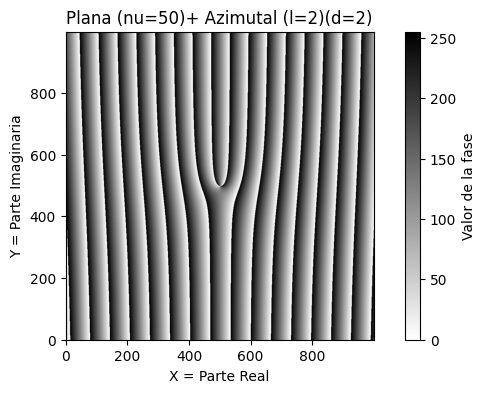

In [81]:
l=2    #Nro cuántico
d=2    #Fase cte adicional de la exp azimutal (múltiplos de pi/2)
nu=50  #Frecuencia de la onda plana
phase_eA_plus_P=np.angle(eA(phi,l,d)*P(Z,nu)) #Notar que hay que hacer el producto para que aparezca el tenedor
phase_eA_plus_P_n = (phase_eA_plus_P+np.pi)/(2*np.pi)*255
phase_eA_plus_P_n_r=np.round(phase_eA_plus_P_n,0)
np.savetxt('redondeado',phase_eA_plus_P_n_r,fmt='%i')

# Step 5: Plot phase of f(phi)+g(z) using colormap
#plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=100
#plt.imshow(phase_eA_plus_P_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.imshow(phase_eA_plus_P_n_r, origin='lower', cmap='binary') #Se podría usar el argumento norm acá para normalizar
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Plana (nu=%i)'%nu+'+ Azimutal (l=%i)'%l+'(d=%i)'%d)
#plt.savefig('Plana (nu=%i)'%nu+' + Azimutal (l=%i)'%l+'(d=%i)'%d)
plt.show()


## Discretización a Binario y máscara

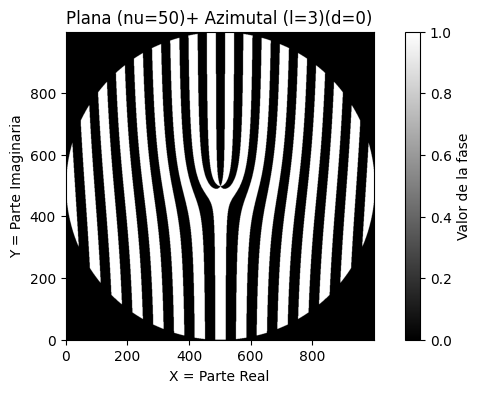

In [83]:
l=3   #Nro cuántico
d=0    #Fase cte adicional de la exp azimutal (múltiplos de pi/2)
R=1
nu=50

phase_eA_plus_P=np.angle(eA(phi,l,d)*P(Z,nu)) #Notar que hay que hacer el producto para que aparezca el tenedor

phase_eA_plus_P_n = (phase_eA_plus_P+np.pi)/(2*np.pi)

phase_eA_plus_P_n_r=np.round(phase_eA_plus_P_n,0) #Redondeamos

phase_eA_plus_P_n_r_Masked= phase_eA_plus_P_n_r*np.heaviside(R-abs(Z),1) #Creamos la máscara circular

np.savetxt('redondeado',phase_eA_plus_P_n_r_Masked,fmt='%i')


# Step 5: Plot phase of f(phi)+g(z) using colormap
#plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(8,4)
#plt.imshow(phase_eA_plus_P_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.imshow(phase_eA_plus_P_n_r_Masked, origin='lower', cmap='binary_r') #El subindice _r invierte el cmap                                            
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Plana (nu=%i)'%nu+'+ Azimutal (l=%i)'%l+'(d=%i)'%d)
#plt.savefig('Plana (nu=%i)'%nu+' + Azimutal (l=%i)'%l+'(d=%i)'%d)
plt.show()


## Dimensionamiento

0.0005
m= 0.02


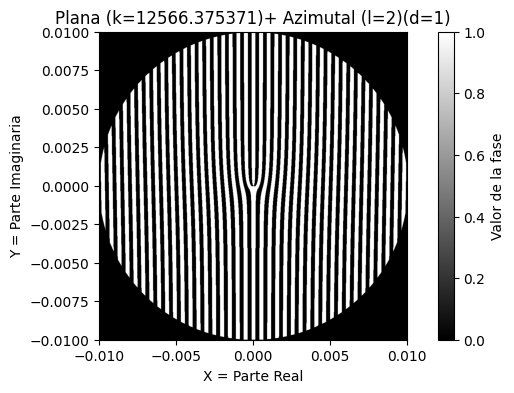

In [9]:
lam=532.8*10**(-9) #longitud de onda en m
#DPI=1
#p=5 #pixeles en cada periodo de la onda plana  
#T=p*25.4/(DPI*10**3)  #Periodo espacial de la onda plana en m #Acá está la info de los DPI
T=500e-6 #metros
print(T)
#DPI=
alpha=lam/T #angulo de inclinacion de la onda plana 
n=1000  #puntos en cada eje
#m=n*T/p  #dimensión del lado del diagrama en m. T/p=resolucion maxima
m=2*10**(-2) #cm
print("m=",m)
k=(2*np.pi /lam) * np.tan(alpha)    #numero de onda de la onda plana
R=0.01    #Radio en puntos 

l=2    #Nro cuántico
d=1    #Fase cte adicional de la exp azimutal (múltiplos de pi/2)

#Create a grid of X and Y values
#n=100 #puntos en cada eje
#m=1 #dimension del lado del diagrama 
X = np.linspace(-m/2, m/2, n)
Y = np.linspace(-m/2, m/2, n)
X, Y = np.meshgrid(X, Y)
Z= Y-1j*X #Si acá reemplazo X por Y puedo rotar pi/2 la onda plana, y el tenedor queda vertical

#Defino el ángulo polar phi
phi=np.arctan2(Y,X) #Primero se pone Y y luego X, así dice numpy y wikipedia

#Onda1=eA(phi,l,d)*P(-1j*X,k)
#Onda2=eA(-phi,l,-d)*P(1j*X,k)

#Intensidad=Onda1*Onda2

phase_eA_plus_P=np.angle(eA(phi,l,d)*P(-1j*X,k)) #Notar que hay que hacer el producto para que aparezca el tenedor
#phase_eA_plus_P=np.angle(Intensidad)

phase_eA_plus_P_n = (phase_eA_plus_P+np.pi)/(2*np.pi)

phase_eA_plus_P_n_r=np.round(phase_eA_plus_P_n,0) #Redondeamos

phase_eA_plus_P_n_r_Masked= phase_eA_plus_P_n_r*np.heaviside(R-abs(Z),1) #Creamos la máscara circular

#np.savetxt('redondeado',phase_eA_plus_P_n_r,fmt='%i')


# Step 5: Plot phase of f(phi)+g(z) using colormap
#plt.rcParams['figure.figsize']=(5,5)
#plt.rcParams['figure.dpi']=100
#plt.rcParams['figure.figsize']=(8,4)
#plt.imshow(phase_eA_plus_P_n, extent=(-m, m, -m, m), origin='lower', cmap='gray') #Se podría usar el argumento norm acá para normalizar
plt.imshow(phase_eA_plus_P_n_r_Masked, extent=(-m/2, m/2, -m/2, m/2), origin='lower', cmap='binary_r') #El subindice _r invierte el cmap                                            
plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
plt.xlabel('X = Parte Real')
plt.ylabel('Y = Parte Imaginaria')
plt.title('Plana (k=%f)'%k+'+ Azimutal (l=%i)'%l+'(d=%i)'%d)
#plt.savefig('Plana (nu=%i)'%nu+' + Azimutal (l=%i)'%l+'(d=%i)'%d)
plt.show()


## Diagramas de Fork

Las limitaciones experimentales estan asociadas a la precision en DPI de la impresión,
hasta ahora sabemos que tenemos un margen de 300DPI, esto quiere decir que existen entonces

\begin{equation*}
300DPI ----> \approx 12 \frac{\text{puntos}}{mm}
\end{equation*}
de modo que la separación entre puntos (uno blanco, uno negro) es aproximadamente 

\begin{equation*}
\Delta l= 1/12 = 0.083 mm = 83 um
\end{equation*}

Luego, el periodo se comprende entre dos puntos negros, por lo tanto

\begin{align*}
T > 2\cdot \Delta l &= 170 um \quad \text{para 300DPI}\\
T > 2\cdot \Delta l &= 42 um \quad \text{para 1200DPI}
\end{align*}

Ahora, nosotros tenemos diapositivas de 20x20 mm, de modo que la cantidad de puntos P que
consideremos define la precisión de la imagen. Esta debe ser inferior a la precisión de la
impresión. Por tanto, llamando Delta P a la distancia espacial entre puntos, tenemos la cota superior
de puntos que podemos tomar

\begin{align*}
\Delta P = \frac{20mm}{P} > 85um ------->  &P< \frac{20mm}{85x10^{-3}mm} = 230 \quad \text{para 300DPI}\\
\Delta P = \frac{20mm}{P}  > 21um ------->  &P< \frac{20mm}{21x10^{-3}mm} = 950 \quad \text{para 1200DPI}
\end{align*}

In [95]:
DPI=1200 #dado por la impresora, pero el savefig pide un valor. asi hacemos coincidir todo.

lim_sup_separacionBN=25.4/DPI # mm, Separacion maxima admisible por la cantidad de DPI.
cantidad_maxima_puntos=20/lim_sup_separacionBN #Maxima cantidad de puntos posible para 20x20mm
maximo_periodo=2*lim_sup_separacionBN #mm, cota superior de periodos posibles.

print('La mínima separación entre puntos es: ', round(lim_sup_separacionBN,3),'mm')
print('La maxima cantidad de puntos es: P <', round(cantidad_maxima_puntos,0))
print('El máximo periodo posible es: T > ', round(maximo_periodo,3), 'mm')

La mínima separación entre puntos es:  0.021 mm
La maxima cantidad de puntos es: P < 945.0
El máximo periodo posible es: T >  0.042 mm


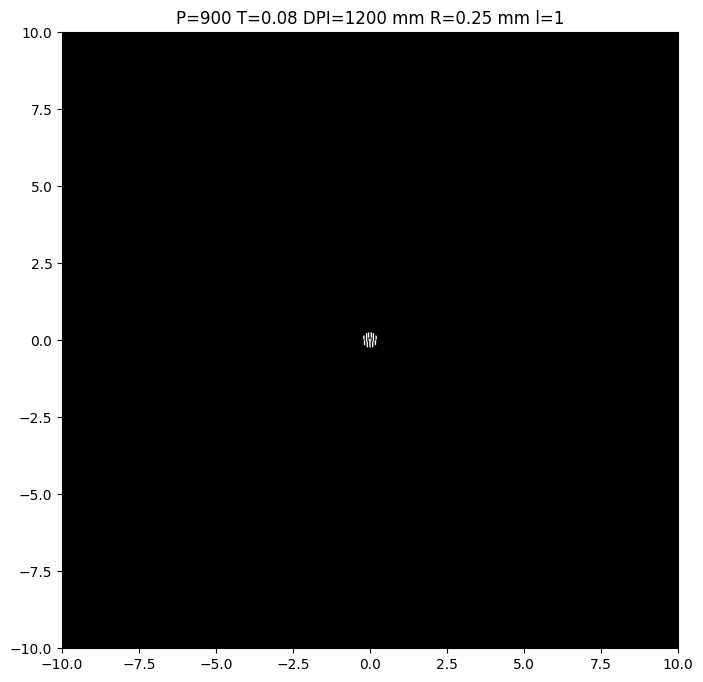

In [98]:
#------- Parametros Libres ---------
lam=532.8*10**(-6) #longitud de onda en mm
R=0.25  #Radio de máscara en mm
l=1    #Nro cuántico
d=2   #Fase cte adicional de la exp azimutal (múltiplos de pi/2)
T_min=0.042 #mm
f=2

T=f*T_min #mm

# Para 300DPI --> n<230
# Para 300DPI --> n<950
Puntos=900 #puntos en cada eje
m=20 #mm
#------------------------------------

alpha=lam/T #angulo de inclinacion de la onda plana 
k=(2*np.pi /lam) * np.tan(alpha)    #numero de onda de la onda plana

X = np.linspace(-m/2, m/2, Puntos)
Y = np.linspace(-m/2, m/2, Puntos)
X, Y = np.meshgrid(X, Y)
Z= Y-1j*X

# Exponencial de onda plana
def P(Z,nu):
    return np.exp(nu*Z)

# Exponencial Azimutal
def eA(phi,l,d):
    return np.exp(1j*(l*phi-d*np.pi/2))

#Defino el ángulo polar phi
phi=np.arctan2(Y,X) #Primero se pone Y y luego X, así dice numpy y wikipedia

phase_eA_plus_P=np.angle(eA(phi,l,d)*P(-1j*X,k)) #Notar que hay que hacer el producto para que aparezca el tenedor

phase_eA_plus_P_n = (phase_eA_plus_P+np.pi)/(2*np.pi)

phase_eA_plus_P_n_r=np.round(phase_eA_plus_P_n,0) #Redondeamos

phase_eA_plus_P_n_r_Masked= phase_eA_plus_P_n_r*np.heaviside(R-abs(Z),1) #Creamos la máscara circular

plt.figure(figsize=(8,8))
plt.imshow(phase_eA_plus_P_n_r_Masked, extent=(-m/2, m/2, -m/2, m/2), origin='lower', cmap='binary_r') #El subindice _r invierte el cmap                                            
#plt.colorbar(label='Valor de la fase')  # Optional: Add a colorbar to indicate the grayscale levels
#plt.xlabel('X = Parte Real')
#plt.ylabel('Y = Parte Imaginaria')
plt.title('P=%i T=%.2f DPI=%i mm R=%.2f mm l=%i' % (Puntos, T, DPI, R,l))

title=str('P=%i T=%.2f DPI=%i mm R=%.2f mm l=%i' % (Puntos, T, DPI, R,l))

plt.savefig(title, format='jpg', dpi=DPI, bbox_inches='tight')
plt.show()